/home/yokoyama/conda/envs/robust-gan/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yokoyama/robust-GAN/gan_torch/sigma.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G.est_sigma.data = torch.tensor(self.G_init, dtype=torch.float32).to(self.device)
100%|██████████| 500/500 [00:28<00:00, 17.64it/s]


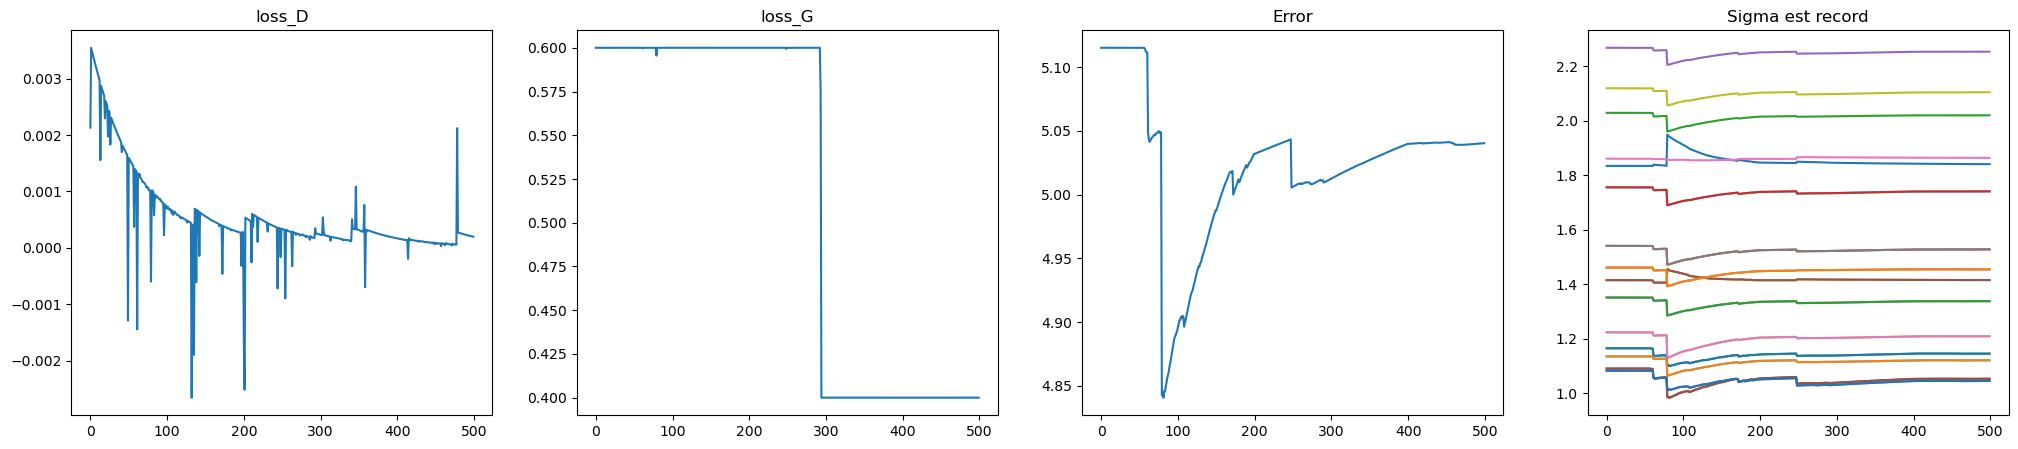

100%|██████████| 500/500 [00:29<00:00, 16.95it/s]


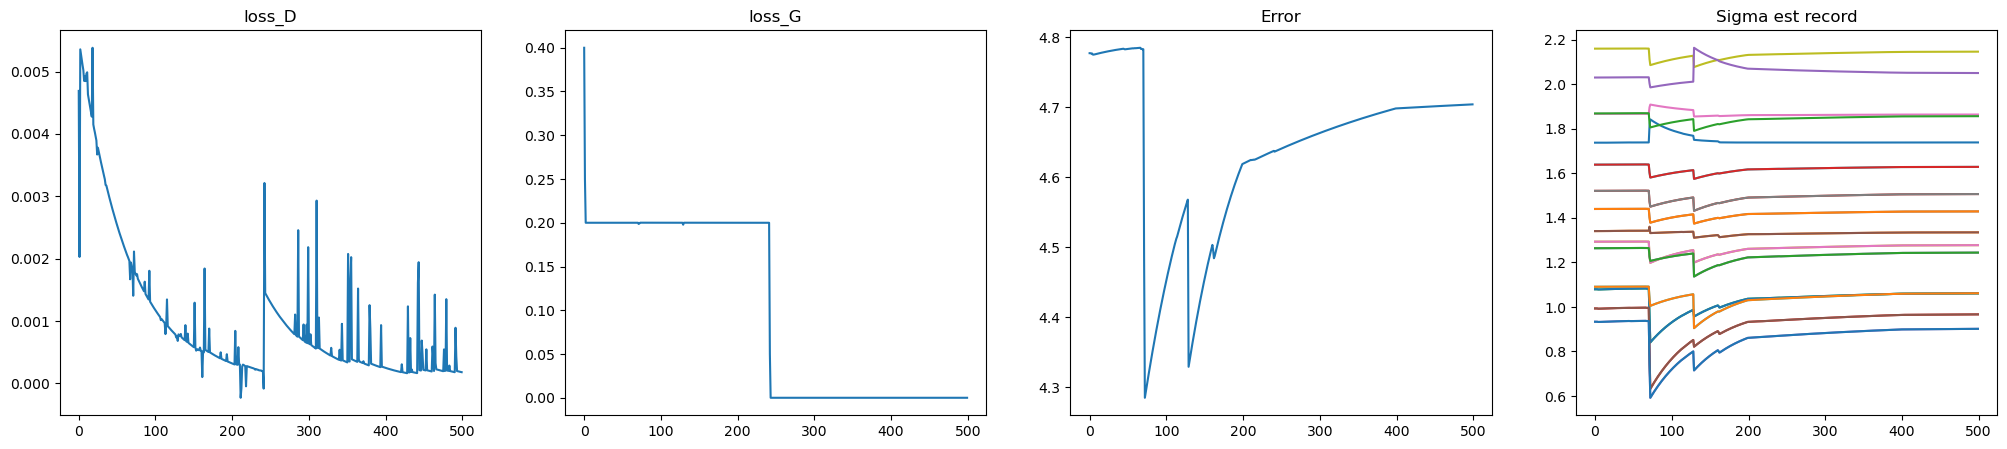

In [1]:
from sigma import Sigma
import numpy as np
import matplotlib.pyplot as plt
from utils import ar_cov, kendall
data_dim = 5
for _ in range(2):
    gan = Sigma(data_dim, 0.2, 'cpu')
    true_mean = np.zeros(data_dim)
    out_mean = np.ones(data_dim) * 6
    gan.dist_init(true_mean, out_mean, ar_cov(data_dim), ar_cov(data_dim))
    gan.data_init(1000, 25)
    gan.model_init()
    gan.optimizer_init(0.01, 0.1, 5, 1, weight_decay_d=8e-2, weight_decay_g=2.5e-5)
    gan.fit(500)
    gan.plot()

In [4]:
gan.sigma_est_record[0]

array([[8.7285595, 8.533691 , 8.539223 , 7.840323 , 7.374712 ],
       [8.533691 , 8.790834 , 8.827566 , 8.095145 , 7.5682454],
       [8.539223 , 8.827566 , 9.290644 , 8.626887 , 8.043915 ],
       [7.840323 , 8.095145 , 8.626887 , 8.567459 , 8.143274 ],
       [7.374712 , 7.5682454, 8.043915 , 8.143274 , 8.197449 ]],
      dtype=float32)

In [33]:
import torch
data = torch.tensor([
    [1, 2, 3],
    [1, 2, 3],
    [2, 2, 4]    
])
A = torch.diag(torch.tensor([1, 2, 3]))
Adata = torch.matmul(A, data.T).T
Adata

tensor([[ 1,  4,  9],
        [ 1,  4,  9],
        [ 2,  4, 12]])

In [12]:
torch.dot(Adata, data.T)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [43]:
single_data = torch.tensor([2, 2, 3])
As = torch.matmul(data, single_data.T)
As, As.T

(tensor([15, 15, 20]), tensor([15, 15, 20]))

In [22]:
torch.matmul(As, single_data)

tensor(120)

In [32]:

data = torch.randn(100, 5)
ken = torch.tensor(kendall(data))
torch.matmul(ken, ken.T) - torch.matmul(ken.T, ken)

tensor([[0.0000e+00, 3.4694e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.4694e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       dtype=torch.float64)

In [40]:
import numpy as np
ndata = np.array(data)
torch.matmul(data, data.T).T - ndata @ ndata.T

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [41]:
torch.matmul(data, data.T)

tensor([[14, 14, 18],
        [14, 14, 18],
        [18, 18, 24]])